In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

## Read in Testing and Training data

In [2]:
training_data = pd.read_csv(r"C:\Users\razaf\Project1\KNN\trainingData.txt")

In [3]:
training_data.columns =['x', 'y', 'z', 'map']

In [4]:
#training_data

In [5]:
X_train = training_data.loc[:, ['x', 'y', 'z']]
Y_train = training_data.loc[:, 'map'].values

In [6]:
#X_train.shape

In [7]:
#Y_train.shape

In [8]:
testing_data = pd.read_csv(r"C:\Users\razaf\Project1\KNN\testingData.txt")

In [9]:
testing_data.columns =['x', 'y', 'z', 'map']

In [10]:
#testing_data

In [11]:
X_test = testing_data.loc[:, ['x', 'y', 'z']]
Y_test = testing_data.loc[:, 'map'].values

In [12]:
#X_test.shape

In [13]:
#Y_test.shape

## 3d plotting training data to see relative accuracy

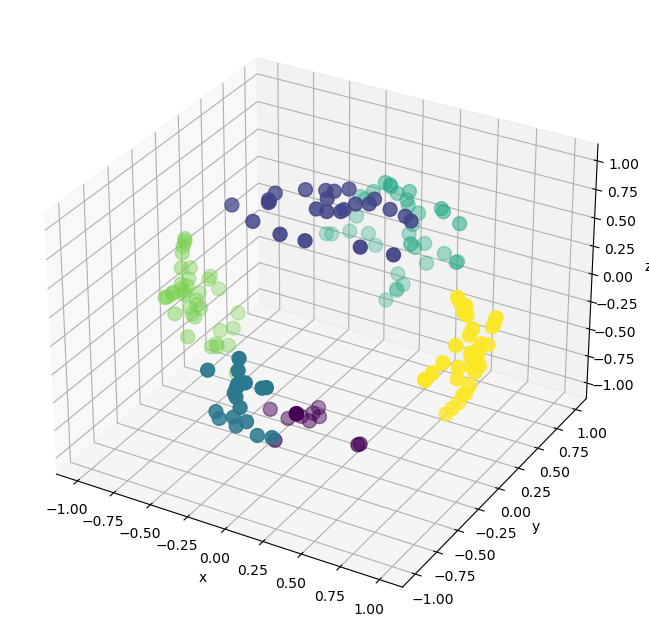

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['x'], X_train['y'], X_train['z'], c = Y_train, marker = 'o', s=100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## Simple data fitting with KNN model

In [15]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [16]:
knn.score(X_test, Y_test)

1.0

Testing data fits perfectly

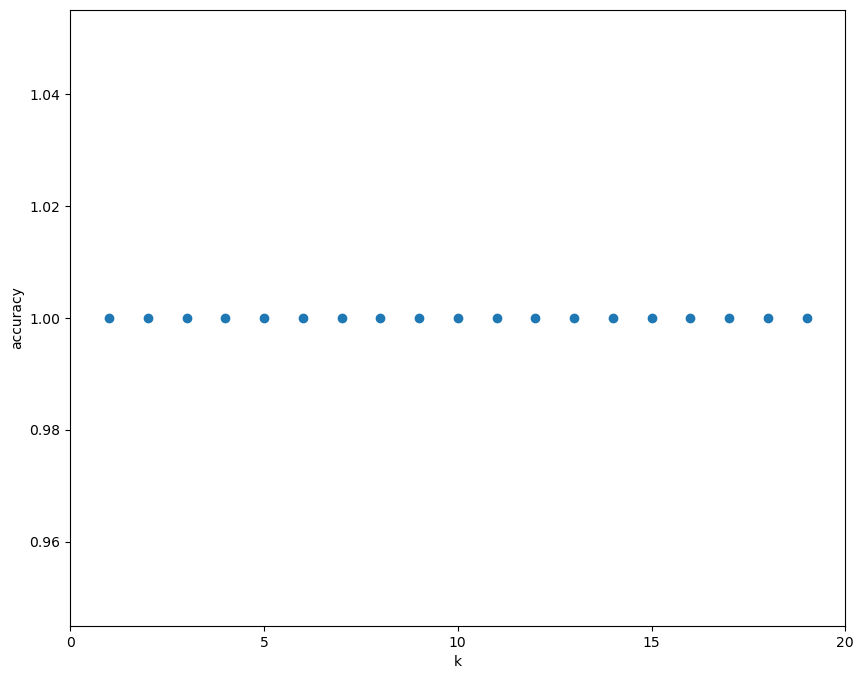

In [17]:
#set k range from 1 to 20
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    scores.append(knn.score(X_test, Y_test))

plt.figure(figsize=(10,8))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

evident that n neighbors isn't consequential

## Load in set of unknown data

In [18]:
unknown_data = pd.read_csv(r"C:\Users\razaf\Project1\KNN\unknownData.txt")

In [19]:
unknown_data.columns =['x', 'y', 'z']

In [20]:
#unknown_data

In [21]:
X_unknown = unknown_data.loc[:, ['x', 'y', 'z']]

In [22]:
#X_unknown.shape

## Preform prediction calculation with KNN model

In [23]:
Y_pred=knn.predict(X_unknown)

In [24]:
Y_pred

array([5, 1, 4, 3, 4, 1, 1, 2, 5, 6, 2, 5, 5, 2, 3, 3, 4, 6, 4, 1, 6, 5],
      dtype=int64)

## Load in known correct data

In [26]:
correct_values = pd.read_csv(r"C:\Users\razaf\Project1\KNN\results.txt")

In [27]:
correct_values.columns =['x', 'y', 'z', 'map', 'Orientation']
correct_values.drop(['Orientation'], axis=1)
Y_correct = correct_values['map']

### % Similarity of predicted values from KNN vs actual results

In [28]:
diff = 0
for i in range(len(Y_pred)-1):
    if Y_pred[i] != Y_correct.iloc[i]:
        diff += 1

print((len(Y_pred)-diff)/len(Y_pred) * 100, "%")

100.0 %


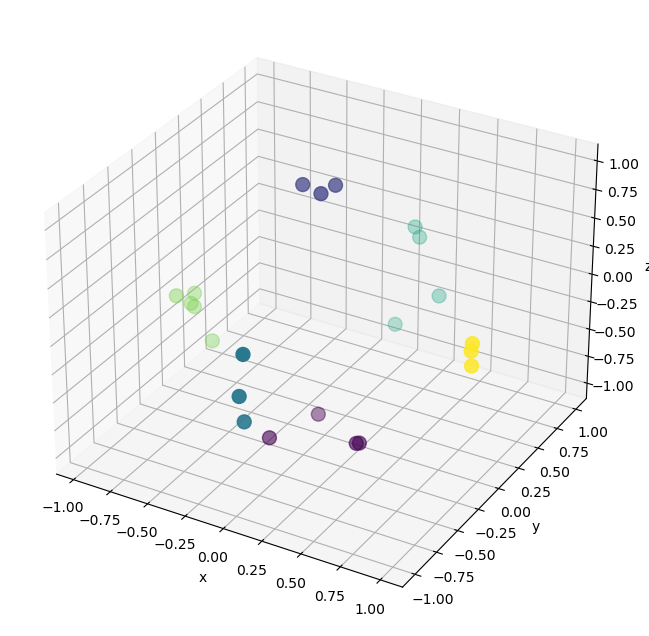

In [29]:
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_unknown['x'], X_unknown['y'], X_unknown['z'], c = Y_pred, marker = 'o', s=100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()